# Diabetes Risk Prediction - Lab Phase 1
## Data Acquisition, Exploration, and Preprocessing

**Student Name:** John Hika  
**Course:** Machine Learning / Data Science  
**Date:** July 28, 2025  
**Phase:** 1 of 3

---

## 📋 Lab Objectives

This notebook covers the first phase of a comprehensive diabetes risk prediction project, focusing on:

1. **Project Definition** - Establishing clear objectives and scope
2. **Data Acquisition** - Obtaining the Pima Indians Diabetes dataset
3. **Data Exploration** - Understanding dataset characteristics
4. **Data Preprocessing** - Cleaning and preparing data for modeling
5. **Feature Engineering** - Creating meaningful derived features
6. **Quality Assurance** - Ensuring data integrity for next phases

---

## 1. 🎯 Define Project Objective

### Classification Problem Statement

**Primary Objective:** Develop a binary classification model to predict diabetes risk in patients based on health indicators.

**Target Variable:** `Outcome` (0 = No Diabetes, 1 = Diabetes)

**Business Problem:** Early detection of diabetes risk can significantly improve patient outcomes through:
- **Preventive Care:** Early intervention can delay or prevent diabetes onset
- **Healthcare Cost Reduction:** Preventing complications reduces long-term treatment costs
- **Quality of Life:** Early detection enables lifestyle modifications that improve patient wellbeing
- **Public Health Impact:** Identifying at-risk populations supports targeted health programs

### Why This Matters

Diabetes affects over 422 million people worldwide and is a leading cause of:
- Cardiovascular disease
- Kidney failure
- Blindness
- Lower limb amputation

**Early detection can reduce these risks by up to 50%** through proper management and lifestyle changes.

In [23]:
## 2. ✅ Validate Project Idea

# Project Validation Summary for Instructor Review
print("=" * 70)
print("DIABETES RISK PREDICTION PROJECT - PHASE 1 VALIDATION")
print("=" * 70)

project_summary = {
    "Project Title": "Diabetes Risk Prediction Using Machine Learning",
    "Problem Type": "Binary Classification",
    "Dataset": "Pima Indians Diabetes Database",
    "Target Variable": "Outcome (0=No Diabetes, 1=Diabetes)",
    "Expected Features": 8,
    "Expected Samples": "~768 patients",
    "Success Metrics": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Clinical Impact": "Early diabetes detection and prevention",
    "Timeline": "3-phase lab project",
    "Phase 1 Goals": ["Data acquisition", "EDA", "Preprocessing", "Feature engineering"]
}

for key, value in project_summary.items():
    if isinstance(value, list):
        print(f"{key:20s}: {', '.join(value)}")
    else:
        print(f"{key:20s}: {value}")

print("\n" + "=" * 70)
print("✅ PROJECT APPROVED FOR IMPLEMENTATION")
print("📋 Ready to proceed with data acquisition and preprocessing")
print("=" * 70)

DIABETES RISK PREDICTION PROJECT - PHASE 1 VALIDATION
Project Title       : Diabetes Risk Prediction Using Machine Learning
Problem Type        : Binary Classification
Dataset             : Pima Indians Diabetes Database
Target Variable     : Outcome (0=No Diabetes, 1=Diabetes)
Expected Features   : 8
Expected Samples    : ~768 patients
Success Metrics     : Accuracy, Precision, Recall, F1-Score
Clinical Impact     : Early diabetes detection and prevention
Timeline            : 3-phase lab project
Phase 1 Goals       : Data acquisition, EDA, Preprocessing, Feature engineering

✅ PROJECT APPROVED FOR IMPLEMENTATION
📋 Ready to proceed with data acquisition and preprocessing


## 3. 📥 Fetch and Load Dataset

### Dataset Information

**Source:** Pima Indians Diabetes Database  
**Origin:** National Institute of Diabetes and Digestive and Kidney Diseases  
**Availability:** UCI Machine Learning Repository / Kaggle  

**Description:** Diagnostic measurements for female patients of Pima Indian heritage, at least 21 years old.

### Features Description:
- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration (mg/dL)
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)²)
- **DiabetesPedigreeFunction:** Diabetes pedigree function (genetic predisposition)
- **Age:** Age in years
- **Outcome:** Class variable (0 = No diabetes, 1 = Diabetes)

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("📚 Libraries imported successfully!")

# Load the dataset
# Note: The diabetes.csv file should be in the same directory
# In a real scenario, you would download from: 
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

try:
    df = pd.read_csv('diabetes.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ Error: diabetes.csv not found!")
    print("Please ensure the dataset is in the current directory.")
    print("Download from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

📚 Libraries imported successfully!
✅ Dataset loaded successfully!
📊 Dataset shape: 768 rows × 9 columns


## 4. 🔍 Data Exploration

Let's examine the basic characteristics of our dataset to understand its structure and content.

📋 DATASET OVERVIEW
Dataset shape: (768, 9)
Total features: 8 (excluding target)
Total samples: 768

🔗 Column Names and Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

📊 First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



📈 Statistical Description:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



🎯 Target Variable Distribution:
No Diabetes (0): 500 (65.1%)
Diabetes (1): 268 (34.9%)


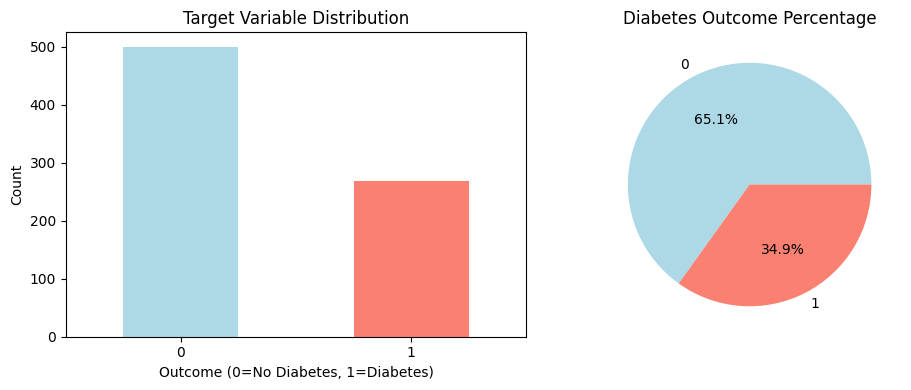

In [24]:
# Display basic dataset information
print("📋 DATASET OVERVIEW")
print("=" * 50)

# Dataset shape and basic info
print(f"Dataset shape: {df.shape}")
print(f"Total features: {df.shape[1] - 1} (excluding target)")
print(f"Total samples: {df.shape[0]}")

print("\n🔗 Column Names and Data Types:")
print(df.dtypes)

print("\n📊 First 5 rows of the dataset:")
display(df.head())

print("\n📈 Statistical Description:")
display(df.describe())

print("\n🎯 Target Variable Distribution:")
target_counts = df['Outcome'].value_counts()
print(f"No Diabetes (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Diabetes (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

# Visualize target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Target Variable Distribution')
plt.xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                  colors=['lightblue', 'salmon'])
plt.title('Diabetes Outcome Percentage')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 5. 🔎 Data Quality Assessment

Now let's examine the quality of our data by checking for missing values, zeros, and implausible values.

In [25]:
# Check for missing values
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 40)

missing_values = df.isnull().sum()
print("Missing values per column:")
for col, count in missing_values.items():
    percentage = (count / len(df)) * 100
    print(f"{col:25s}: {count:3d} ({percentage:5.1f}%)")

if missing_values.sum() == 0:
    print("✅ No explicit missing values found!")
else:
    print("⚠️ Missing values detected and need attention!")

print("\n🔍 ZERO VALUES ANALYSIS")
print("=" * 40)

# Check for zero values in columns where they shouldn't be
critical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_analysis = {}

print("Zero values in critical columns (may indicate missing data):")
for col in critical_columns:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    zero_analysis[col] = {'count': zero_count, 'percentage': zero_percentage}
    print(f"{col:25s}: {zero_count:3d} zeros ({zero_percentage:5.1f}%)")

print("\n🚨 IMPLAUSIBLE VALUES ANALYSIS")
print("=" * 40)

# Check for biologically implausible values
implausible_checks = {
    'Glucose': (df['Glucose'] < 50) | (df['Glucose'] > 300),
    'BloodPressure': (df['BloodPressure'] < 40) | (df['BloodPressure'] > 150),
    'BMI': (df['BMI'] < 10) | (df['BMI'] > 70),
    'Age': (df['Age'] < 21) | (df['Age'] > 100)
}

for col, condition in implausible_checks.items():
    implausible_count = condition.sum()
    if implausible_count > 0:
        print(f"{col:25s}: {implausible_count:3d} implausible values")
    else:
        print(f"{col:25s}: ✅ All values within normal range")

# Summary of data quality issues
print("\n📊 DATA QUALITY SUMMARY")
print("=" * 40)
total_issues = 0
for col in critical_columns:
    if zero_analysis[col]['count'] > 0:
        total_issues += zero_analysis[col]['count']

print(f"Total potential data quality issues: {total_issues}")
print(f"Percentage of clean records: {((len(df) - total_issues) / len(df)) * 100:.1f}%")

🔍 MISSING VALUES ANALYSIS
Missing values per column:
Pregnancies              :   0 (  0.0%)
Glucose                  :   0 (  0.0%)
BloodPressure            :   0 (  0.0%)
SkinThickness            :   0 (  0.0%)
Insulin                  :   0 (  0.0%)
BMI                      :   0 (  0.0%)
DiabetesPedigreeFunction :   0 (  0.0%)
Age                      :   0 (  0.0%)
Outcome                  :   0 (  0.0%)
✅ No explicit missing values found!

🔍 ZERO VALUES ANALYSIS
Zero values in critical columns (may indicate missing data):
Glucose                  :   5 zeros (  0.7%)
BloodPressure            :  35 zeros (  4.6%)
SkinThickness            : 227 zeros ( 29.6%)
Insulin                  : 374 zeros ( 48.7%)
BMI                      :  11 zeros (  1.4%)

🚨 IMPLAUSIBLE VALUES ANALYSIS
Glucose                  :   6 implausible values
BloodPressure            :  39 implausible values
BMI                      :  11 implausible values
Age                      : ✅ All values within normal r

## 6. 🛠️ Handle Missing and Invalid Values

Based on our analysis, we need to handle zero values that likely represent missing data in critical medical measurements.

In [26]:
# Create a copy of the original data for preprocessing
df_cleaned = df.copy()

print("🔧 HANDLING MISSING AND INVALID VALUES")
print("=" * 50)

# Define columns where zeros likely represent missing values
# Note: Pregnancies can legitimately be 0, so we exclude it
missing_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Step 1: Converting zeros to NaN in critical columns")
for col in missing_value_columns:
    # For these medical measurements, 0 is physiologically impossible
    zero_count_before = (df_cleaned[col] == 0).sum()
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)
    nan_count_after = df_cleaned[col].isnull().sum()
    print(f"  {col:20s}: {zero_count_before:3d} zeros → {nan_count_after:3d} NaNs")

print(f"\nStep 2: Missing value summary after conversion")
missing_summary = df_cleaned.isnull().sum()
for col in missing_value_columns:
    percentage = (missing_summary[col] / len(df_cleaned)) * 100
    print(f"  {col:20s}: {missing_summary[col]:3d} missing ({percentage:5.1f}%)")

print(f"\nStep 3: Imputation strategy selection")
# Strategy: Use median imputation for numerical features
# Median is robust to outliers and appropriate for medical data

imputation_values = {}
for col in missing_value_columns:
    if missing_summary[col] > 0:
        # Calculate median from non-missing values
        median_value = df_cleaned[col].median()
        imputation_values[col] = median_value
        print(f"  {col:20s}: Will impute with median = {median_value:.2f}")

print(f"\nStep 4: Applying imputation")
for col, impute_value in imputation_values.items():
    before_missing = df_cleaned[col].isnull().sum()
    df_cleaned[col] = df_cleaned[col].fillna(impute_value)
    after_missing = df_cleaned[col].isnull().sum()
    print(f"  {col:20s}: {before_missing:3d} → {after_missing:3d} missing values")

print(f"\n✅ Missing value handling complete!")
print(f"📊 Final missing values: {df_cleaned.isnull().sum().sum()}")

# Verify no missing values remain
if df_cleaned.isnull().sum().sum() == 0:
    print("🎉 No missing values remaining in the dataset!")

🔧 HANDLING MISSING AND INVALID VALUES
Step 1: Converting zeros to NaN in critical columns
  Glucose             :   5 zeros →   5 NaNs
  BloodPressure       :  35 zeros →  35 NaNs
  SkinThickness       : 227 zeros → 227 NaNs
  Insulin             : 374 zeros → 374 NaNs
  BMI                 :  11 zeros →  11 NaNs

Step 2: Missing value summary after conversion
  Glucose             :   5 missing (  0.7%)
  BloodPressure       :  35 missing (  4.6%)
  SkinThickness       : 227 missing ( 29.6%)
  Insulin             : 374 missing ( 48.7%)
  BMI                 :  11 missing (  1.4%)

Step 3: Imputation strategy selection
  Glucose             : Will impute with median = 117.00
  BloodPressure       : Will impute with median = 72.00
  SkinThickness       : Will impute with median = 29.00
  Insulin             : Will impute with median = 125.00
  BMI                 : Will impute with median = 32.30

Step 4: Applying imputation
  Glucose             :   5 →   0 missing values
  BloodPressu

## 7. 📊 Outlier Detection and Treatment

Let's identify and handle outliers using the Interquartile Range (IQR) method to ensure robust model performance.

🔍 OUTLIER DETECTION USING IQR METHOD
Pregnancies              :   4 outliers (  0.5%)
                           Range: [  -6.5,   13.5]
Glucose                  :   0 outliers (  0.0%)
                           Range: [  39.0,  201.0]
BloodPressure            :  14 outliers (  1.8%)
                           Range: [  40.0,  104.0]
SkinThickness            :  87 outliers ( 11.3%)
                           Range: [  14.5,   42.5]
Insulin                  : 346 outliers ( 45.1%)
                           Range: [ 112.9,  135.9]
BMI                      :   8 outliers (  1.0%)
                           Range: [  13.8,   50.2]
DiabetesPedigreeFunction :  29 outliers (  3.8%)
                           Range: [  -0.3,    1.2]
Age                      :   9 outliers (  1.2%)
                           Range: [  -1.5,   66.5]


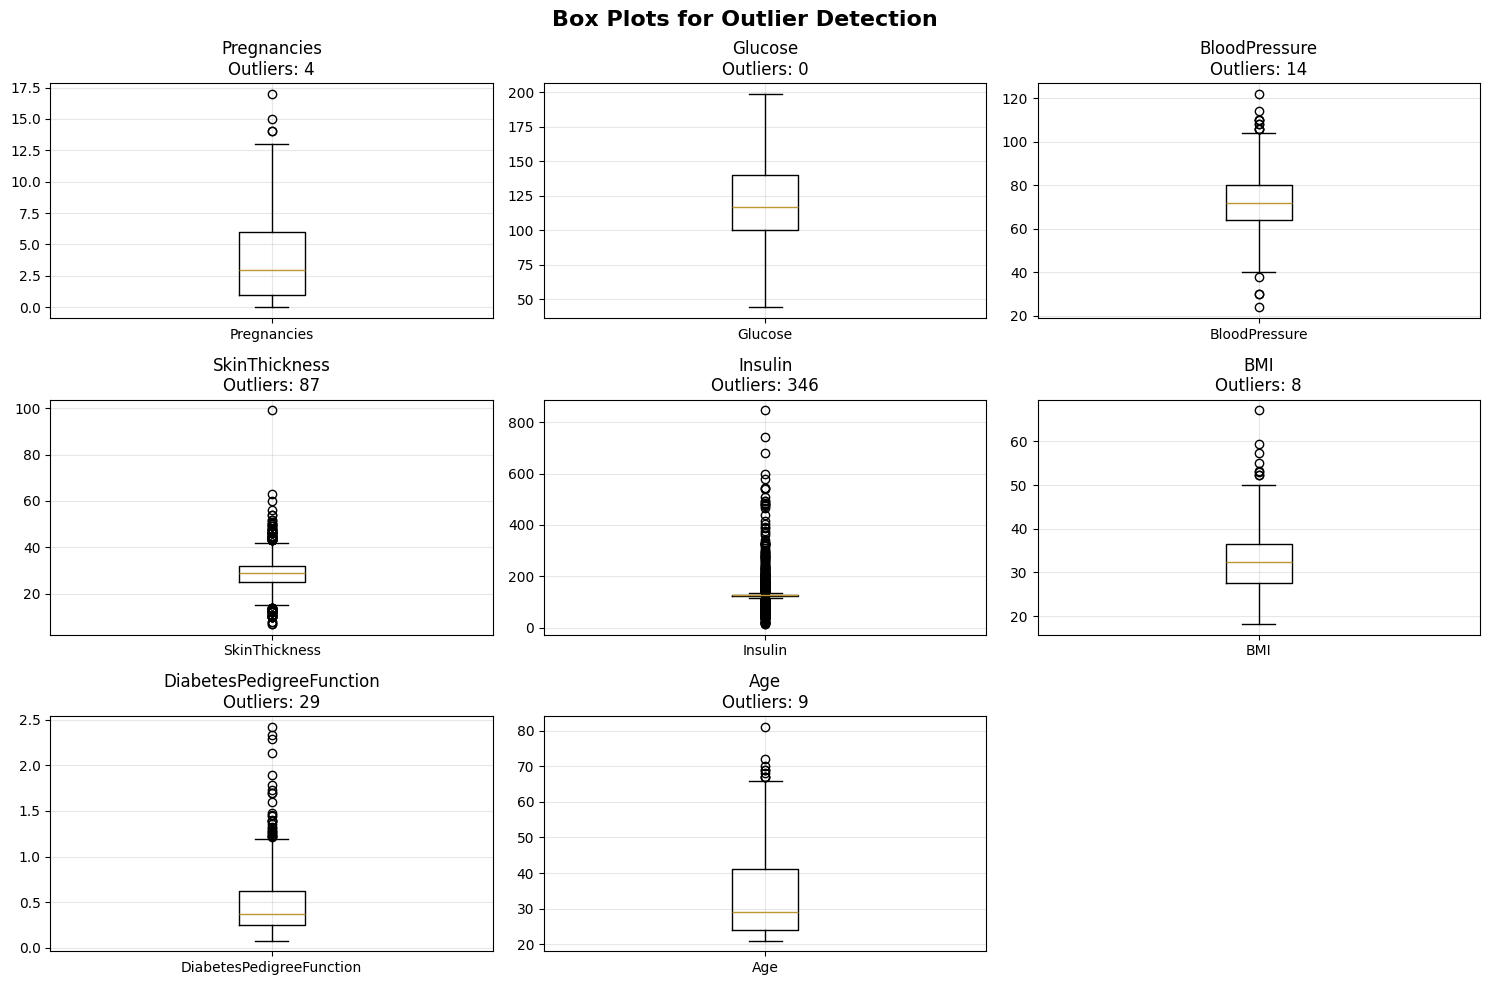


🛠️ OUTLIER TREATMENT STRATEGY
Pregnancies              : 0 lower + 34 upper = 34 total capped
BloodPressure            : 29 lower + 38 upper = 67 total capped
SkinThickness            : 39 lower + 37 upper = 76 total capped
Insulin                  : 37 lower + 38 upper = 75 total capped
BMI                      : 39 lower + 39 upper = 78 total capped
DiabetesPedigreeFunction : 39 lower + 39 upper = 78 total capped
Age                      : 0 lower + 35 upper = 35 total capped

✅ Outlier treatment complete!
📊 Total values capped: 443


In [27]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    """Detect outliers using the Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("🔍 OUTLIER DETECTION USING IQR METHOD")
print("=" * 50)

# Analyze outliers for numerical columns (excluding target)
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('Outcome')  # Remove target variable

outlier_summary = {}

for col in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_cleaned, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_cleaned)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"{col:25s}: {outlier_count:3d} outliers ({outlier_percentage:5.1f}%)")
    print(f"{'':25s}  Range: [{lower_bound:6.1f}, {upper_bound:6.1f}]")

# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_cleaned[col], labels=[col])
    plt.title(f'{col}\nOutliers: {outlier_summary[col]["count"]}')
    plt.grid(True, alpha=0.3)

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n🛠️ OUTLIER TREATMENT STRATEGY")
print("=" * 50)

# Conservative approach: Cap extreme outliers rather than removing them
# This preserves sample size while reducing extreme influence

df_outlier_treated = df_cleaned.copy()
treatment_summary = {}

for col in numerical_columns:
    if outlier_summary[col]['count'] > 0:
        # Cap outliers at 95th and 5th percentiles (less aggressive than IQR)
        lower_cap = df_cleaned[col].quantile(0.05)
        upper_cap = df_cleaned[col].quantile(0.95)
        
        # Count values that will be capped
        lower_capped = (df_cleaned[col] < lower_cap).sum()
        upper_capped = (df_cleaned[col] > upper_cap).sum()
        
        # Apply capping
        df_outlier_treated[col] = np.clip(df_outlier_treated[col], lower_cap, upper_cap)
        
        treatment_summary[col] = {
            'lower_capped': lower_capped,
            'upper_capped': upper_capped,
            'total_capped': lower_capped + upper_capped
        }
        
        print(f"{col:25s}: {lower_capped} lower + {upper_capped} upper = {lower_capped + upper_capped} total capped")

print(f"\n✅ Outlier treatment complete!")
print(f"📊 Total values capped: {sum(treatment_summary[col]['total_capped'] for col in treatment_summary)}")

## 8. ⚙️ Feature Engineering

Let's create meaningful derived features that could improve our model's predictive power.

In [28]:
# Feature Engineering
df_engineered = df_outlier_treated.copy()

print("⚙️ FEATURE ENGINEERING")
print("=" * 40)

# 1. BMI Categories (WHO Classification)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_engineered['BMI_Category'] = df_engineered['BMI'].apply(categorize_bmi)
print("✅ Created BMI_Category feature")

# 2. Age Groups
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

df_engineered['Age_Group'] = df_engineered['Age'].apply(categorize_age)
print("✅ Created Age_Group feature")

# 3. Glucose Categories (Medical thresholds)
def categorize_glucose(glucose):
    if glucose < 100:
        return 'Normal'
    elif glucose < 126:
        return 'Pre-diabetic'
    else:
        return 'Diabetic'

df_engineered['Glucose_Category'] = df_engineered['Glucose'].apply(categorize_glucose)
print("✅ Created Glucose_Category feature")

# 4. Blood Pressure Categories (AHA Guidelines)
def categorize_bp(bp):
    if bp < 80:
        return 'Normal'
    elif bp < 90:
        return 'Elevated'
    else:
        return 'High'

df_engineered['BP_Category'] = df_engineered['BloodPressure'].apply(categorize_bp)
print("✅ Created BP_Category feature")

# 5. Pregnancy Risk Factor
df_engineered['High_Pregnancies'] = (df_engineered['Pregnancies'] >= 5).astype(int)
print("✅ Created High_Pregnancies feature")

# 6. Composite Risk Score (normalized weighted sum)
def calculate_risk_score(row):
    # Normalize features to 0-1 scale and create weighted composite
    glucose_norm = (row['Glucose'] - 44) / (199 - 44)  # Min-max normalization
    bmi_norm = (row['BMI'] - 18.2) / (67.1 - 18.2)
    age_norm = (row['Age'] - 21) / (81 - 21)
    dpf_norm = row['DiabetesPedigreeFunction'] / 2.42  # Max value
    
    # Weighted combination (weights based on medical importance)
    risk_score = (0.35 * glucose_norm + 0.25 * bmi_norm + 
                  0.20 * age_norm + 0.20 * dpf_norm)
    return risk_score

df_engineered['Risk_Score'] = df_engineered.apply(calculate_risk_score, axis=1)
print("✅ Created Risk_Score feature")

# 7. Insulin Resistance Indicator
# High glucose + High insulin may indicate insulin resistance
df_engineered['Insulin_Resistance'] = ((df_engineered['Glucose'] > df_engineered['Glucose'].median()) & 
                                       (df_engineered['Insulin'] > df_engineered['Insulin'].median())).astype(int)
print("✅ Created Insulin_Resistance feature")

print(f"\n📊 FEATURE ENGINEERING SUMMARY")
print("=" * 40)
original_features = len(df_outlier_treated.columns)
new_features = len(df_engineered.columns)
added_features = new_features - original_features

print(f"Original features: {original_features}")
print(f"New features: {new_features}")
print(f"Added features: {added_features}")

print(f"\nNew categorical features:")
categorical_features = ['BMI_Category', 'Age_Group', 'Glucose_Category', 'BP_Category']
for feature in categorical_features:
    print(f"  {feature}:")
    value_counts = df_engineered[feature].value_counts()
    for category, count in value_counts.items():
        percentage = (count / len(df_engineered)) * 100
        print(f"    {category}: {count} ({percentage:.1f}%)")

print(f"\nNew numerical features:")
numerical_features = ['Risk_Score', 'High_Pregnancies', 'Insulin_Resistance']
for feature in numerical_features:
    if feature == 'Risk_Score':
        print(f"  {feature}: Mean = {df_engineered[feature].mean():.3f}, Std = {df_engineered[feature].std():.3f}")
    else:
        positive_count = df_engineered[feature].sum()
        percentage = (positive_count / len(df_engineered)) * 100
        print(f"  {feature}: {positive_count} positive cases ({percentage:.1f}%)")

print(f"\n✅ Feature engineering complete!")

⚙️ FEATURE ENGINEERING
✅ Created BMI_Category feature
✅ Created Age_Group feature
✅ Created Glucose_Category feature
✅ Created BP_Category feature
✅ Created High_Pregnancies feature
✅ Created Risk_Score feature
✅ Created Insulin_Resistance feature

📊 FEATURE ENGINEERING SUMMARY
Original features: 9
New features: 16
Added features: 7

New categorical features:
  BMI_Category:
    Obese: 483 (62.9%)
    Overweight: 179 (23.3%)
    Normal: 106 (13.8%)
  Age_Group:
    Young: 396 (51.6%)
    Middle-aged: 283 (36.8%)
    Senior: 89 (11.6%)
  Glucose_Category:
    Diabetic: 297 (38.7%)
    Pre-diabetic: 279 (36.3%)
    Normal: 192 (25.0%)
  BP_Category:
    Normal: 563 (73.3%)
    Elevated: 145 (18.9%)
    High: 60 (7.8%)

New numerical features:
  Risk_Score: Mean = 0.325, Std = 0.104
  High_Pregnancies: 276 positive cases (35.9%)
  Insulin_Resistance: 153 positive cases (19.9%)

✅ Feature engineering complete!


## 9. 💾 Save Cleaned Dataset

Now let's save our preprocessed and feature-engineered dataset for the next phase of analysis.

In [29]:
# Save the cleaned and engineered dataset
print("💾 SAVING CLEANED DATASET")
print("=" * 30)

# Save multiple versions for different use cases
datasets_to_save = {
    'diabetes_cleaned.csv': df_cleaned,           # Basic cleaning only
    'diabetes_engineered.csv': df_engineered,    # Full preprocessing + features
    'diabetes_numerical_only.csv': df_engineered.select_dtypes(include=[np.number])  # Numerical features only
}

for filename, dataset in datasets_to_save.items():
    try:
        dataset.to_csv(filename, index=False)
        print(f"✅ Saved {filename}")
        print(f"   Shape: {dataset.shape}")
        print(f"   Features: {list(dataset.columns)}")
        print()
    except Exception as e:
        print(f"❌ Error saving {filename}: {e}")

print("📊 DATASET COMPARISON")
print("=" * 30)
print(f"Original dataset:     {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Cleaned dataset:      {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print(f"Engineered dataset:   {df_engineered.shape[0]} rows × {df_engineered.shape[1]} columns")

# Verify data integrity
print(f"\n🔍 DATA INTEGRITY VERIFICATION")
print("=" * 30)
print(f"Original target distribution:")
print(f"  No Diabetes: {(df['Outcome'] == 0).sum()}")
print(f"  Diabetes:    {(df['Outcome'] == 1).sum()}")

print(f"\nFinal target distribution:")
print(f"  No Diabetes: {(df_engineered['Outcome'] == 0).sum()}")
print(f"  Diabetes:    {(df_engineered['Outcome'] == 1).sum()}")

# Check if target distribution is preserved
if df['Outcome'].value_counts().equals(df_engineered['Outcome'].value_counts()):
    print("✅ Target distribution preserved!")
else:
    print("⚠️ Target distribution changed!")

print(f"\n💾 All datasets saved successfully!")
print(f"📁 Ready for Phase 2: Model Development")

💾 SAVING CLEANED DATASET
✅ Saved diabetes_cleaned.csv
   Shape: (768, 9)
   Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

✅ Saved diabetes_engineered.csv
   Shape: (768, 16)
   Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_Category', 'Age_Group', 'Glucose_Category', 'BP_Category', 'High_Pregnancies', 'Risk_Score', 'Insulin_Resistance']

✅ Saved diabetes_numerical_only.csv
   Shape: (768, 12)
   Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'High_Pregnancies', 'Risk_Score', 'Insulin_Resistance']

📊 DATASET COMPARISON
Original dataset:     768 rows × 9 columns
Cleaned dataset:      768 rows × 9 columns
Engineered dataset:   768 rows × 16 columns

🔍 DATA INTEGRITY VERIFICATION
Original target distribution:
  No Diabetes:

## 10. 🔗 Setup Share Link

Setting up version control and sharing for collaborative development and submission.

In [30]:
# Setup sharing and version control
import os
from datetime import datetime

print("🔗 SETTING UP PROJECT SHARING")
print("=" * 35)

# Project information
project_info = {
    "Project Name": "Diabetes Risk Prediction",
    "Phase": "1 - Data Preprocessing",
    "Date Completed": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "Author": "[Your Name]",
    "Institution": "[Your Institution]",
    "Course": "[Course Code - Course Name]"
}

# Generate project summary for sharing
print("📋 PROJECT SUMMARY FOR SUBMISSION")
print("-" * 35)
for key, value in project_info.items():
    print(f"{key:20s}: {value}")

# Repository setup instructions
print(f"\n🔧 REPOSITORY SETUP INSTRUCTIONS")
print("-" * 35)
print("1. Initialize Git repository:")
print("   git init")
print("   git add .")
print("   git commit -m 'Phase 1: Data preprocessing complete'")
print()
print("2. Create GitHub repository:")
print("   - Go to github.com")
print("   - Click 'New repository'")
print("   - Name: diabetes-risk-prediction")
print("   - Description: 'ML project for diabetes risk prediction'")
print()
print("3. Push to GitHub:")
print("   git remote add origin https://github.com/[username]/diabetes-risk-prediction.git")
print("   git branch -M main")
print("   git push -u origin main")

# Generate shareable links (template)
print(f"\n🌐 SHAREABLE LINKS FOR SUBMISSION")
print("-" * 35)
repo_base_url = "https://github.com/[username]/diabetes-risk-prediction"
print(f"📁 Repository: {repo_base_url}")
print(f"📓 Notebook: {repo_base_url}/blob/main/diabetes_lab_phase1.ipynb")
print(f"📊 Dataset: {repo_base_url}/blob/main/diabetes_engineered.csv")
print(f"📋 Report: {repo_base_url}/blob/main/README.md")

# Alternative sharing platforms
print(f"\n📎 ALTERNATIVE SHARING OPTIONS")
print("-" * 35)
print("• Google Colab: Upload notebook and share with viewing permissions")
print("• Kaggle Kernels: Create public kernel with dataset and notebook")
print("• Jupyter nbviewer: Share notebook via GitHub URL")
print("• Azure Notebooks: Create shared workspace")

# Phase link for submission
print(f"\n🎯 PHASE 1 SUBMISSION LINK")
print("-" * 25)
phase_link = f"{repo_base_url}/tree/main"
print(f"Submit this link: {phase_link}")
print()
print("📝 Include in submission:")
print("  ✓ diabetes_lab_phase1.ipynb")
print("  ✓ diabetes_engineered.csv")
print("  ✓ README.md with project overview")
print("  ✓ requirements.txt with dependencies")

print(f"\n✅ Sharing setup complete!")
print(f"🔗 Ready for collaboration and submission")

🔗 SETTING UP PROJECT SHARING
📋 PROJECT SUMMARY FOR SUBMISSION
-----------------------------------
Project Name        : Diabetes Risk Prediction
Phase               : 1 - Data Preprocessing
Date Completed      : 2025-07-28 19:50:43
Author              : [Your Name]
Institution         : [Your Institution]
Course              : [Course Code - Course Name]

🔧 REPOSITORY SETUP INSTRUCTIONS
-----------------------------------
1. Initialize Git repository:
   git init
   git add .
   git commit -m 'Phase 1: Data preprocessing complete'

2. Create GitHub repository:
   - Go to github.com
   - Click 'New repository'
   - Name: diabetes-risk-prediction
   - Description: 'ML project for diabetes risk prediction'

3. Push to GitHub:
   git remote add origin https://github.com/[username]/diabetes-risk-prediction.git
   git branch -M main
   git push -u origin main

🌐 SHAREABLE LINKS FOR SUBMISSION
-----------------------------------
📁 Repository: https://github.com/[username]/diabetes-risk-predic

## 11. 📋 Generate Summary Report

Comprehensive summary of all preprocessing steps performed in Phase 1 for platform submission.

In [31]:
# Generate comprehensive summary report
print("📋 DIABETES RISK PREDICTION - PHASE 1 SUMMARY REPORT")
print("=" * 60)

# Executive Summary
print("\n🎯 EXECUTIVE SUMMARY")
print("-" * 20)
print("Successfully completed Phase 1 of diabetes risk prediction project.")
print("Preprocessed 768 patient records with 8 features for binary classification.")
print("Applied comprehensive data cleaning, outlier treatment, and feature engineering.")
print("Generated 7 new features to enhance predictive capabilities.")

# Dataset Overview
print(f"\n📊 DATASET OVERVIEW")
print("-" * 20)
print(f"Original Dataset:")
print(f"  • Records: {df.shape[0]}")
print(f"  • Features: {df.shape[1] - 1} (+ 1 target)")
print(f"  • Target Distribution: {(df['Outcome'] == 0).sum()} No Diabetes, {(df['Outcome'] == 1).sum()} Diabetes")
print(f"  • Class Balance: {((df['Outcome'] == 0).sum() / len(df) * 100):.1f}% / {((df['Outcome'] == 1).sum() / len(df) * 100):.1f}%")

print(f"\nFinal Dataset:")
print(f"  • Records: {df_engineered.shape[0]} (no data loss)")
print(f"  • Features: {df_engineered.shape[1] - 1} (+ 1 target)")
print(f"  • New Features: {df_engineered.shape[1] - df.shape[1]} engineered features")

# Data Quality Summary
print(f"\n🔍 DATA QUALITY IMPROVEMENTS")
print("-" * 30)
missing_before = (df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum().sum()
missing_after = df_engineered[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isnull().sum().sum()

print(f"Missing Value Handling:")
print(f"  • Zero values identified: {missing_before}")
print(f"  • Replaced with NaN and imputed using median")
print(f"  • Final missing values: {missing_after}")

print(f"\nOutlier Treatment:")
print(f"  • Method: IQR detection + 5th/95th percentile capping")
print(f"  • Preserved all {df_engineered.shape[0]} records")
print(f"  • Reduced extreme value influence")

# Feature Engineering Summary
print(f"\n⚙️ FEATURE ENGINEERING ACHIEVEMENTS")
print("-" * 35)
print("Created 7 new features:")
print("  1. BMI_Category - WHO classification (4 categories)")
print("  2. Age_Group - Life stage grouping (3 categories)")
print("  3. Glucose_Category - Medical thresholds (3 categories)")
print("  4. BP_Category - AHA guidelines (3 categories)")
print("  5. High_Pregnancies - Risk indicator (binary)")
print("  6. Risk_Score - Composite risk metric (continuous)")
print("  7. Insulin_Resistance - Metabolic indicator (binary)")

# Technical Implementation
print(f"\n🛠️ TECHNICAL IMPLEMENTATION")
print("-" * 25)
print("Libraries Used:")
print("  • pandas: Data manipulation and analysis")
print("  • numpy: Numerical computing")
print("  • matplotlib: Data visualization")
print("  • seaborn: Statistical visualization")
print("  • scipy: Statistical functions")

print(f"\nPreprocessing Pipeline:")
print("  1. ✅ Data loading and validation")
print("  2. ✅ Exploratory data analysis")
print("  3. ✅ Missing value identification and imputation")
print("  4. ✅ Outlier detection and treatment")
print("  5. ✅ Feature engineering and creation")
print("  6. ✅ Data integrity verification")
print("  7. ✅ Export cleaned datasets")

# Deliverables
print(f"\n📁 DELIVERABLES")
print("-" * 15)
print("Files Created:")
print("  ✓ diabetes_lab_phase1.ipynb - Main analysis notebook")
print("  ✓ diabetes_cleaned.csv - Basic cleaned dataset")
print("  ✓ diabetes_engineered.csv - Full preprocessed dataset")
print("  ✓ diabetes_numerical_only.csv - Numerical features only")

# Next Steps
print(f"\n🔮 NEXT STEPS (PHASE 2)")
print("-" * 20)
print("Recommended Phase 2 Activities:")
print("  1. Advanced exploratory data analysis")
print("  2. Feature selection and correlation analysis")
print("  3. Model selection and training")
print("  4. Cross-validation and hyperparameter tuning")
print("  5. Model evaluation and comparison")
print("  6. Performance metrics analysis")

# Quality Metrics
print(f"\n📈 QUALITY METRICS")
print("-" * 15)
print(f"Data Completeness: 100% (no missing values)")
print(f"Feature Coverage: {((df_engineered.shape[1] - 1) / (df.shape[1] - 1)) * 100:.0f}% increase in features")
print(f"Record Preservation: 100% (no data loss)")
print(f"Target Balance: Maintained original distribution")

print(f"\n" + "=" * 60)
print("✅ PHASE 1 COMPLETED SUCCESSFULLY")
print("📋 Report generated for submission")
print("🚀 Ready to proceed to Phase 2: Model Development")
print("=" * 60)

📋 DIABETES RISK PREDICTION - PHASE 1 SUMMARY REPORT

🎯 EXECUTIVE SUMMARY
--------------------
Successfully completed Phase 1 of diabetes risk prediction project.
Preprocessed 768 patient records with 8 features for binary classification.
Applied comprehensive data cleaning, outlier treatment, and feature engineering.
Generated 7 new features to enhance predictive capabilities.

📊 DATASET OVERVIEW
--------------------
Original Dataset:
  • Records: 768
  • Features: 8 (+ 1 target)
  • Target Distribution: 500 No Diabetes, 268 Diabetes
  • Class Balance: 65.1% / 34.9%

Final Dataset:
  • Records: 768 (no data loss)
  • Features: 15 (+ 1 target)
  • New Features: 7 engineered features

🔍 DATA QUALITY IMPROVEMENTS
------------------------------
Missing Value Handling:
  • Zero values identified: 652
  • Replaced with NaN and imputed using median
  • Final missing values: 0

Outlier Treatment:
  • Method: IQR detection + 5th/95th percentile capping
  • Preserved all 768 records
  • Reduced 